In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.dropna()

In [4]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [5]:
# X = df_pen.drop(['species'], axis = 1)
X = df_pen.copy(deep = True)

## Data Pre-processing

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
escalador = StandardScaler()
scaled_X = escalador.fit_transform(X)


## Find parameters

### Epsilon

In [8]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(scaled_X)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Epsilon Value')

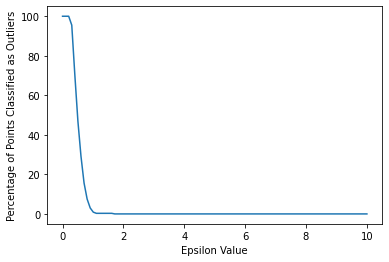

In [9]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

(0.0, 1.0)

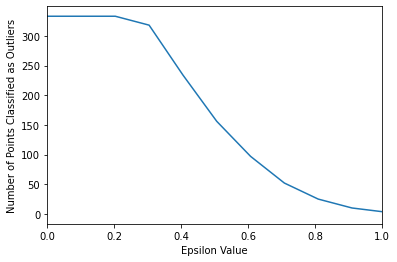

In [10]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

#### Outlier Percentaje Targeting

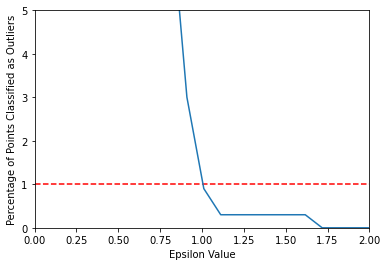

In [11]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

#### Outlier Number Targeting

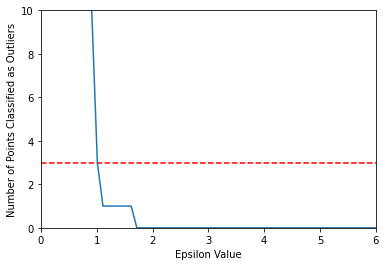

In [12]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

### Min Samples

In [13]:
outlier_percent = []

for n in np.arange(1,20):
    
    # Create Model
    dbscan = DBSCAN(min_samples=n, eps = 1)
    dbscan.fit(scaled_X)
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Minimum Number of Samples')

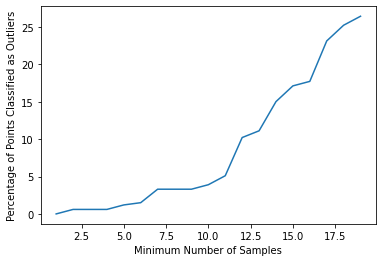

In [14]:
sns.lineplot(x=np.arange(1,20),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

### Number of clusters

#### Epsilon

In [15]:
number_clusters = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps, min_samples= 5)
    dbscan.fit(scaled_X)
    
    # Log Number of Outliers
    number_clusters.append(len(pd.Series(dbscan.labels_).unique()))
    

Text(0.5, 0, 'Epsilon Value')

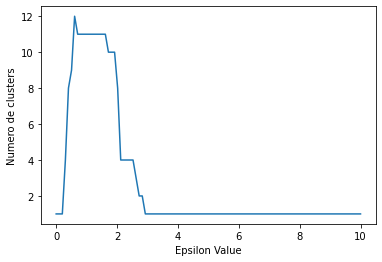

In [16]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_clusters)
plt.ylabel("Numero de clusters")
plt.xlabel("Epsilon Value")

(0.0, 3.0)

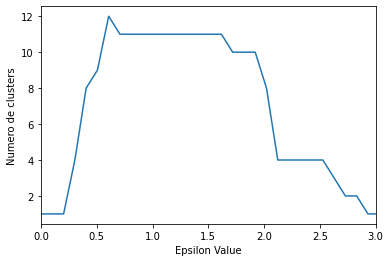

In [17]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_clusters)
plt.ylabel("Numero de clusters")
plt.xlabel("Epsilon Value")
plt.xlim(0,3)

#### Min samples

In [18]:
number_clusters = []

for n in np.arange(1,20):
    
    # Create Model
    dbscan = DBSCAN(min_samples=n, eps = 0.4)
    dbscan.fit(scaled_X)

    number_clusters.append(len(pd.Series(dbscan.labels_).unique()))

Text(0.5, 0, 'Minimum Number of Samples')

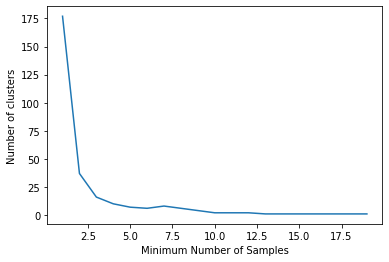

In [19]:
sns.lineplot(x=np.arange(1,20),y=number_clusters)
plt.ylabel("Number of clusters")
plt.xlabel("Minimum Number of Samples")

(0.0, 40.0)

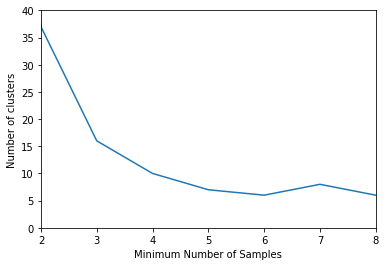

In [20]:
sns.lineplot(x=np.arange(1,20),y=number_clusters)
plt.ylabel("Number of clusters")
plt.xlabel("Minimum Number of Samples")
plt.xlim(2,8)
plt.ylim(0,40)

## Model Implementation

In [21]:
model = DBSCAN(eps = 0.4, min_samples=5)
model.fit(scaled_X)

DBSCAN(eps=0.4)

In [22]:
model.labels_

array([-1,  0, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,  0,
       -1,  1,  2,  1, -1, -1,  5,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1,  0, -1, -1, -1,  0, -1,  3, -1,  1, -1, -1, -1, -1,
       -1, -1, -1,  3, -1, -1, -1, -1,  0, -1,  5, -1, -1, -1, -1,  2, -1,
        2, -1, -1, -1, -1, -1, -1,  0, -1, -1,  3, -1, -1, -1, -1, -1, -1,
       -1,  4,  3, -1, -1, -1,  3,  0, -1, -1, -1,  2,  3, -1, -1,  1, -1,
        0, -1, -1, -1, -1, -1,  0,  3,  2, -1, -1,  4,  0, -1,  2,  0, -1,
        3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1,  4,  4, -1,
        3,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  3,
       -1,  0,  1, -1, -1, -1, -1, -1, -1,  2,  0, -1, -1, -1, -1, -1,  4,
       -1, -1, -1, -1, -1, -1,  1, -1,  0, -1,  5, -1, -1, -1, -1, -1,  1,
        5, -1, -1, -1,  4

In [23]:
X.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,49.2,18.2,195.0,4400.0,1,0,1,0,1
1,45.1,14.5,215.0,5000.0,0,1,0,0,0
2,39.6,17.7,186.0,3500.0,0,0,0,0,0


In [24]:
X['DBSCAN Clusters'] = model.labels_
df_pen['DBSCAN Clusters'] = model.labels_

In [25]:
X.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male,DBSCAN Clusters
0,49.2,18.2,195.0,4400.0,1,0,1,0,1,-1
1,45.1,14.5,215.0,5000.0,0,1,0,0,0,0
2,39.6,17.7,186.0,3500.0,0,0,0,0,0,-1


In [26]:
df_pen.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,DBSCAN Clusters
0,Chinstrap,Dream,49.2,18.2,195.0,4400.0,Male,-1
1,Gentoo,Biscoe,45.1,14.5,215.0,5000.0,Female,0
2,Adelie,Biscoe,39.6,17.7,186.0,3500.0,Female,-1


In [27]:
df_pen['DBSCAN Clusters'].value_counts()

-1    242
 0     26
 1     19
 3     18
 4     12
 2     11
 5      5
Name: DBSCAN Clusters, dtype: int64

### Correlacion con variables

In [28]:
X.corr()['DBSCAN Clusters'].sort_values()

bill_depth_mm       -0.266578
island_Torgersen    -0.207677
island_Dream        -0.023224
sex_Male             0.017143
species_Chinstrap    0.182093
body_mass_g          0.280083
species_Gentoo       0.315524
bill_length_mm       0.357227
flipper_length_mm    0.358088
DBSCAN Clusters      1.000000
Name: DBSCAN Clusters, dtype: float64

In [29]:
correlacion_absoluta = np.abs(X.corr()['DBSCAN Clusters'].sort_values()[:-1]).sort_values().reset_index()

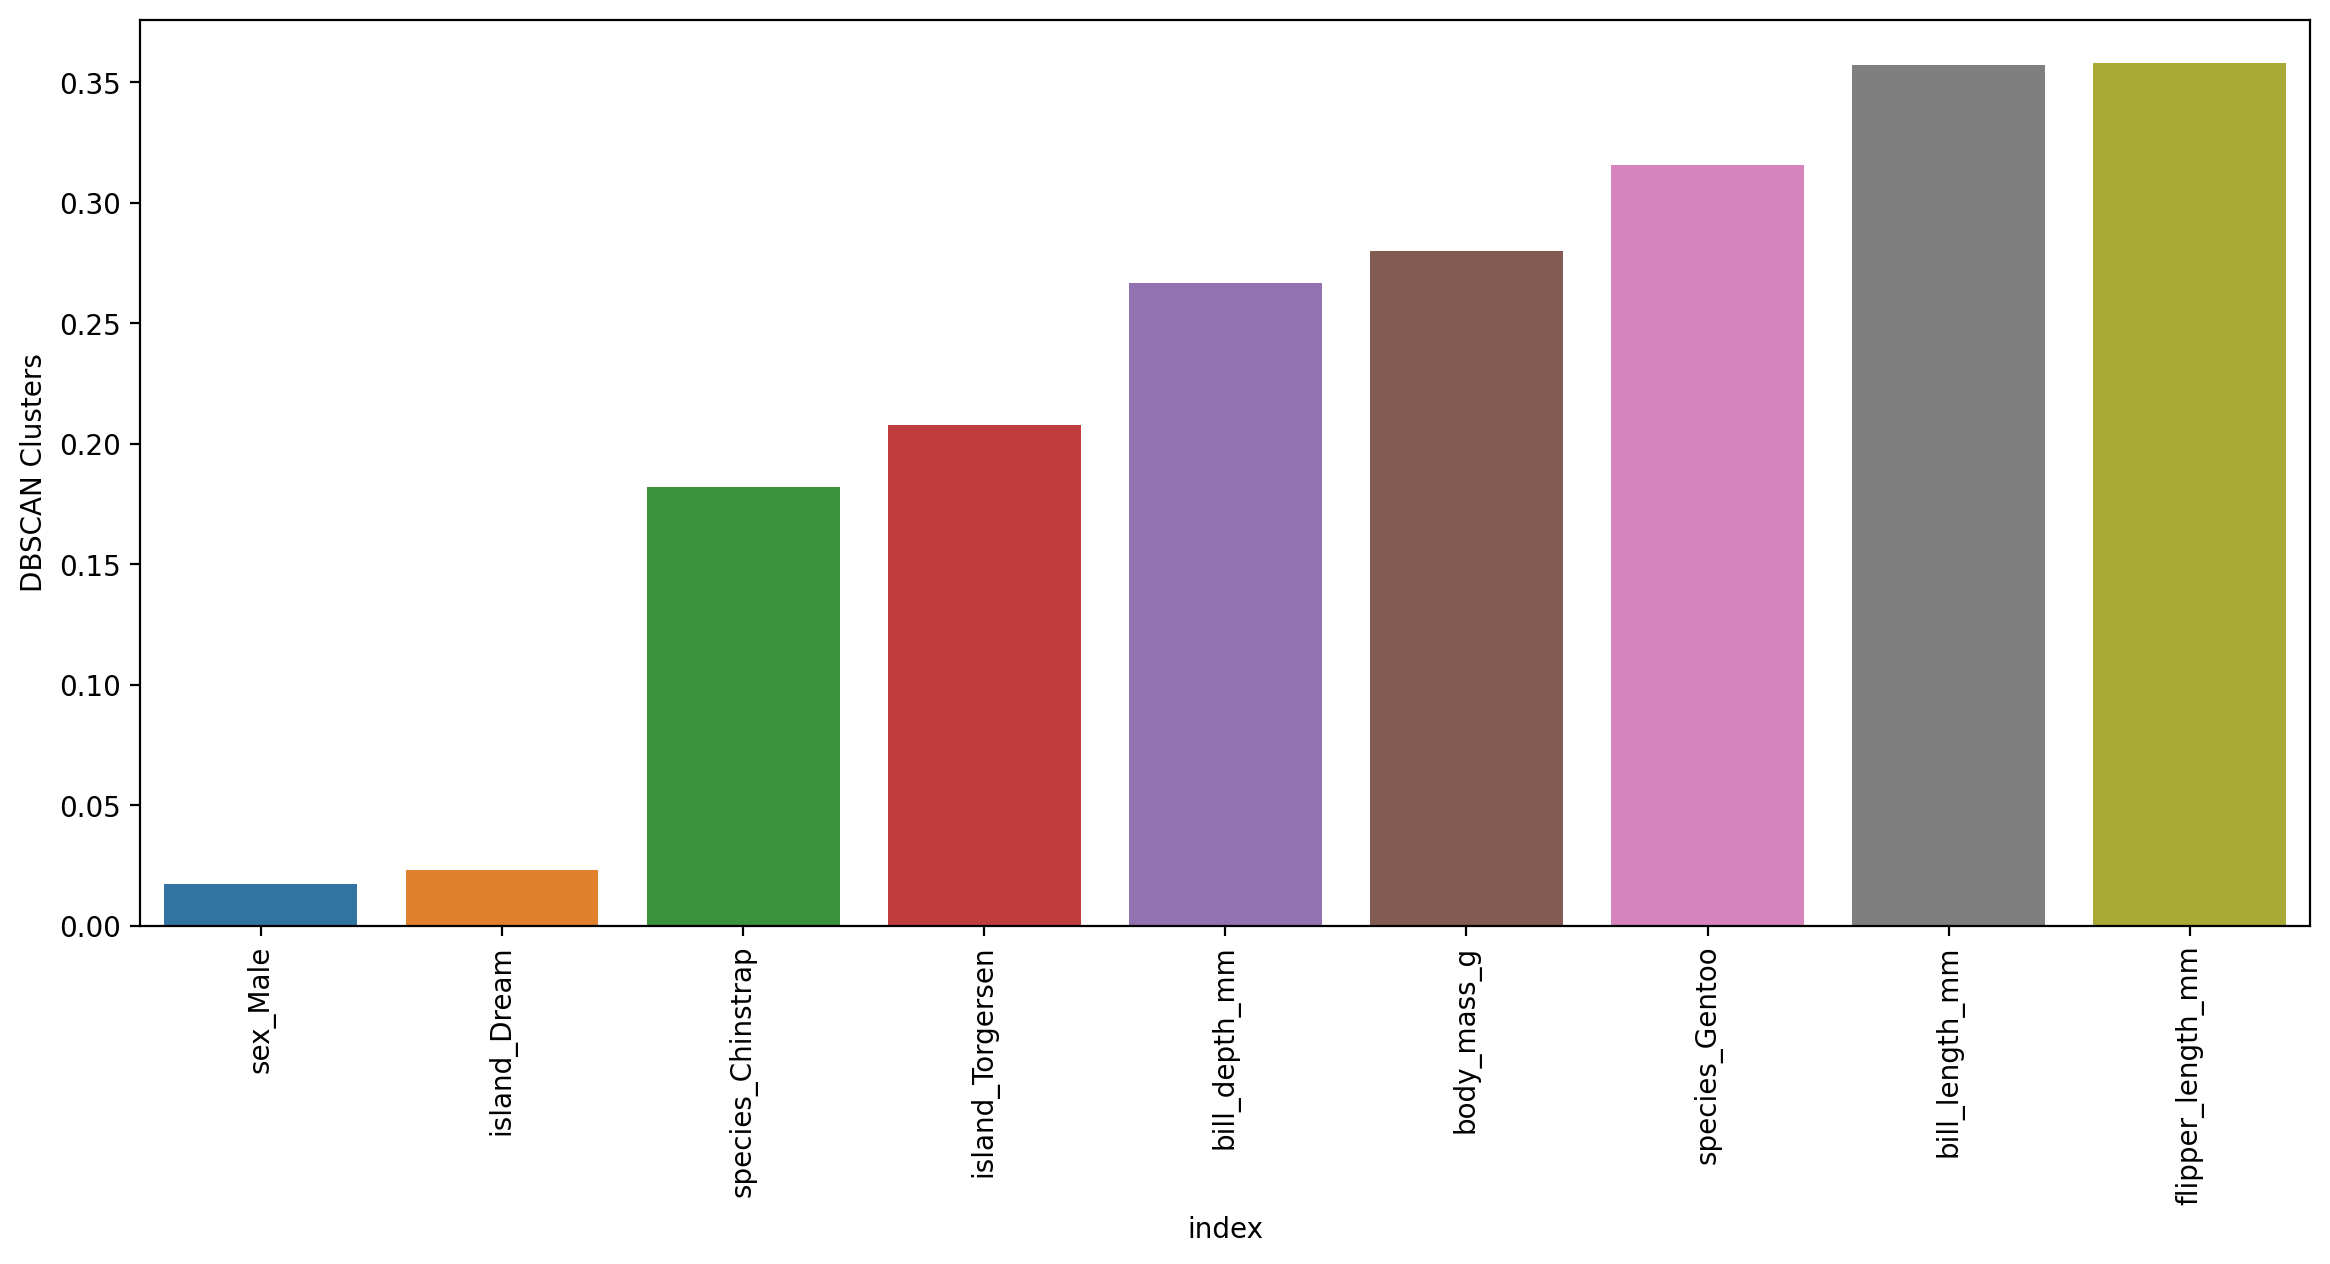

In [30]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data = correlacion_absoluta,x='index',y='DBSCAN Clusters')

plt.xticks(rotation=90);